# Initial setup

In [1]:
import sys
sys.path.append("../")
# import libraries
from os import path, listdir
import numpy as np
import pandas as pd
import seaborn
import utils.data_utils as data_utils
import matplotlib.pyplot as plt

In [2]:
# display all columns in command outputs (e.g. head())
pd.set_option('display.max_columns', None)

# EDA


In [3]:
result = data_utils.load_financial(encode_ticker=True, raw=False)

In [4]:
print(result.describe())

               Open          High           Low         Close        Volume  \
count  1.022181e+07  1.022181e+07  1.022181e+07  1.022181e+07  1.022181e+07   
mean   1.094212e-18  2.168787e-19  2.107529e-19 -1.135659e-19 -8.387539e-19   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.634815e-03 -2.465120e-03 -2.663523e-03 -2.565992e-03 -2.276643e-03   
25%   -4.757033e-04 -4.631358e-04 -4.555661e-04 -4.519282e-04 -1.674400e-03   
50%   -4.533493e-04 -4.454356e-04 -4.357042e-04 -4.311271e-04 -1.385771e-03   
75%   -4.304992e-04 -4.287613e-04 -4.153315e-04 -4.097930e-04 -9.427570e-04   
max    3.032715e+03  3.056634e+03  3.062554e+03  3.071663e+03  3.160052e+03   

             Ticker     Sentiment     SPX_Close  
count  1.022181e+07  1.022181e+07  1.022181e+07  
mean   4.332930e+03  5.345802e-01 -1.540395e-17  
std    2.507437e+03  4.988028e-01  1.000000e+00  
min    0.000000e+00  0.000000e+00 -7.055598e+00  
25%    2.113000e+03  0.000000e+00 -3.7

In [5]:
print(result.head()) 

                Open      High       Low     Close    Volume  Ticker  \
Date                                                                   
2008-09-02 -0.000448 -0.000500 -0.000449 -0.000443 -0.001862     474   
2008-09-02 -0.000403 -0.000353 -0.000376 -0.000352 -0.000538    6936   
2008-09-02 -0.000441 -0.000392 -0.000353 -0.000372 -0.000623    2533   
2008-09-02 -0.000497 -0.000479 -0.000493 -0.000483 -0.001133    3777   
2008-09-02 -0.000481 -0.000434 -0.000435 -0.000414 -0.001035    6525   

            Sentiment  SPX_Close  
Date                              
2008-09-02        0.0  -0.346636  
2008-09-02        0.0  -0.346636  
2008-09-02        0.0  -0.346636  
2008-09-02        0.0  -0.346636  
2008-09-02        0.0  -0.346636  


In [6]:
print(result.shape)

(10221814, 8)


In [7]:
print(result.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10221814 entries, 2008-09-02 to 2016-07-01
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Volume     float64
 5   Ticker     int64  
 6   Sentiment  float64
 7   SPX_Close  float64
dtypes: float64(7), int64(1)
memory usage: 701.9 MB
None


                   Open      High           Low     Close        Volume  \
Open       1.000000e+00  0.999680  9.993682e-01  0.999013  5.620245e-07   
High       9.996796e-01  1.000000  9.998348e-01  0.999730  1.276292e-06   
Low        9.993682e-01  0.999835  1.000000e+00  0.999946  4.169018e-07   
Close      9.990127e-01  0.999730  9.999457e-01  1.000000  1.204353e-06   
Volume     5.620245e-07  0.000001  4.169018e-07  0.000001  1.000000e+00   
Ticker     6.545738e-04  0.000646  6.421564e-04  0.000638 -4.616261e-05   
Sentiment -2.495887e-04 -0.000257 -2.592330e-04 -0.000257  2.985378e-04   
SPX_Close -1.869198e-04 -0.000186 -1.760787e-04 -0.000171  1.968185e-04   

             Ticker  Sentiment  SPX_Close  
Open       0.000655  -0.000250  -0.000187  
High       0.000646  -0.000257  -0.000186  
Low        0.000642  -0.000259  -0.000176  
Close      0.000638  -0.000257  -0.000171  
Volume    -0.000046   0.000299   0.000197  
Ticker     1.000000  -0.000168   0.000275  
Sentiment -0.000

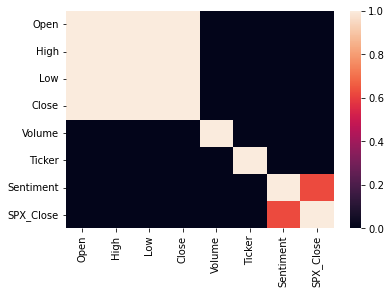

In [9]:
# This block prints the correlation table and heatmap for result df
print(result.corr())

seaborn.heatmap(result.corr());

AttributeError: 'Rectangle' object has no property 'hist_kws'

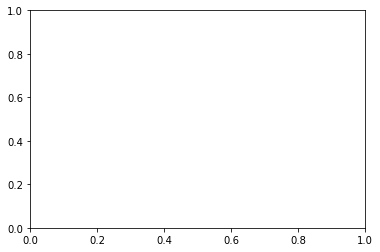

In [54]:
#fig = plt.figure(figsize = (10,5))
#ax = fig.gca()
#result['SPX_Close'].hist(bins=50, ax = ax)
#result['Close'].hist(bins=50,range=(-5e-04,-3e-04), ax = ax)
#result.Volume.hist(bins=50,range=(-0.005,0.005))
cols = result[['Volume', 'Close']].copy()
seaborn.histplot(cols.melt(), x='value', hue='variable',multiple='dodge', shrink=.75, bins=50, hist_kws={"range": [-5e-04,-3e-04]});

In [ ]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
result['SPX_Close'].hist(bins=50, ax = ax)

<AxesSubplot:>

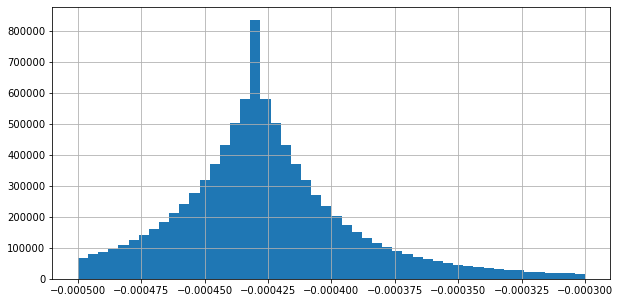

In [36]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
result.Close.hist(bins=50,range=(-5e-04,-3e-04), ax = ax)

<AxesSubplot:>

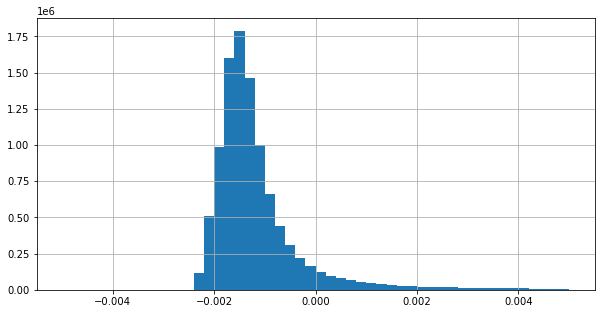

In [38]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
result.Volume.hist(bins=50,range=(-0.005,0.005), ax =ax)

In [13]:
# Save file in csv format
#normalised_result.to_csv('./data/normalised_result.csv')